<a href="https://colab.research.google.com/github/fahimalamabir/ABCofDataScience_python/blob/main/WorkBC_Employment_Services_by_Region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uncovering the Patterns: An Outlier Analysis of WorkBC Employment Data by Region by Fahim Alam

**Introduction**
Introduction:
In an era where data is pivotal to understanding economic dynamics, the WorkBC Employment Services data offers an invaluable resource for grasping the contours of regional employment landscapes. This project, titled "Uncovering the Patterns: An Outlier Analysis of WorkBC Employment Data by Region," aims to dissect the monthly data starting from April 2019 to unearth patterns, trends, and outliers in the economic development regions of British Columbia.

By employing statistical methods to pinpoint anomalies, this analysis ventures beyond mere averages to delve into the specificities of employment service utilization—case managed new starts, self-serve new starts, and case managed employment success. This endeavor not only highlights regional disparities but also sheds light on temporal trends that may correlate with policy shifts, economic events, or changing labor market dynamics. Through a meticulous sifting of data, we seek to provide stakeholders with actionable insights that can steer workforce development strategies, regional economic planning, and resource allocation.

**Loading data:
First, let's load and examine the [datasets](https://https://catalogue.data.gov.bc.ca/dataset/workbc-employment-services-by-region) to understand its structure and identify any initial data quality issues. Then, we can proceed with creating visualizations based on our findings. I’ll start by loading and displaying the first few rows of both the data file and the data dictionary to see what we're working with.

In [29]:
import pandas as pd

# Load the main dataset and the data dictionary
data_path = '/content/workbc_es_region.csv'
dictionary_path = '/content/workbc_es_region_dictionary.csv'

# Reading the files
data = pd.read_csv(data_path)
data_dictionary = pd.read_csv(dictionary_path)

# Displaying the first few rows of each dataset
data.head()


,YM,RegionCode,CaseManagedNewStarts,SelfServeNewStarts,CaseManagedEmployment
0,201904,EDR1,297,351,196
1,201904,EDR2,840,243,333
2,201904,EDR3,321,183,177
3,201904,EDR4,105,75,81
4,201904,EDR5,120,70,63


**Data Overview:**
The dataset includes the following columns:


*   YM: Year and month of the data in YYYYMM format.

*   RegionCode: Economic development region code.


*   CaseManagedNewStarts: Number of clients who started a case-managed service.
*   SelfServeNewStarts: Number of clients who started self-service.

*   CaseManagedEmployment: Number of case-managed clients who achieved successful employment.


**Data Dictionary Overview:**
It appears there's some formatting irregularity in the data dictionary file, but we can extract the relevant information:

Each RegionCode corresponds to a specific geographic area in British Columbia, such as Vancouver Island or Northeast.
Descriptions are provided for each field in the dataset, indicating what they represent.

Next Steps:
- Clean and Extract Data Dictionary Information: Format the data dictionary for easier reference.
- Data Quality Analysis: Check for missing values, outliers, and other data inconsistencies.
- Visualize Data Quality Issues: Create visualizations that highlight these issues.
- Prepare Dashboard Elements: Based on the analysis, prepare elements that could be part of a dashboard to represent data quality.


Let's start by cleaning up the data dictionary for clearer access and use, then move on to analyzing the data quality.

In [5]:
# Display a broader range of rows to understand where relevant data definitions start and end
data_dictionary.iloc[3:25, :]



,Dataset Name: WorkBC Emplopyment Services by Economic Development Region - April 2019 to most recent month available.,Unnamed: 1,Unnamed: 2,Unnamed: 3
3,NaN,NaN,NaN,NaN
4,Data Definitions:,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,heading,headingdef,element,elementdef
7,YM,Calendar year and month of data in YYYYMM format,,NaN
8,RegionCode,Economic Development Region of BC,EDR1,Vancouver Island / Coast
9,RegionCode,Economic Development Region of BC,EDR2,Mainland / Southwest
10,RegionCode,Economic Development Region of BC,EDR3,Thompson / Okanagan
11,RegionCode,Economic Development Region of BC,EDR4,Kootenay
12,RegionCode,Economic Development Region of BC,EDR5,Cariboo


Let's proceed with the data quality analysis of the main dataset.

In [ ]:
# Extracting relevant data from rows based on observed layout and column names
data_dictionary_definitions = data_dictionary.iloc[6:18, :].copy()
data_dictionary_definitions.columns = ['Field', 'Description', 'RegionCode', 'RegionDescription']

# Cleaning DataFrame by removing NaN values in the 'Field' column
data_dictionary_definitions = data_dictionary_definitions.dropna(subset=['Field'])

# Resetting the index for cleaner view
data_dictionary_definitions.reset_index(drop=True, inplace=True)

data_dictionary_definitions


In [31]:
df_merger = pd.merge(data, data_dictionary_definitions, on='RegionCode', how='left')
df_merger.head()

,YM,RegionCode,CaseManagedNewStarts,SelfServeNewStarts,CaseManagedEmployment,Field,Description,RegionDescription
0,201904,EDR1,297,351,196,RegionCode,Economic Development Region of BC,Vancouver Island / Coast
1,201904,EDR2,840,243,333,RegionCode,Economic Development Region of BC,Mainland / Southwest
2,201904,EDR3,321,183,177,RegionCode,Economic Development Region of BC,Thompson / Okanagan
3,201904,EDR4,105,75,81,RegionCode,Economic Development Region of BC,Kootenay
4,201904,EDR5,120,70,63,RegionCode,Economic Development Region of BC,Cariboo


In [33]:
df_merger.nunique()

YM                        60
RegionCode                 7
CaseManagedNewStarts     277
SelfServeNewStarts       166
CaseManagedEmployment    211
Field                      1
Description                1
RegionDescription          7
dtype: int64

In [34]:
df = df_merger.drop(['Field', 'Description'], axis=1)

**Statistical Summary:**

In [35]:
# Checking for missing values and basic statistical summary of the dataset
missing_values = df.isnull().sum()
statistical_summary = df.describe()

missing_values, statistical_summary

(YM                       0
 RegionCode               0
 CaseManagedNewStarts     0
 SelfServeNewStarts       0
 CaseManagedEmployment    0
 RegionDescription        0
 dtype: int64,
                   YM  CaseManagedNewStarts  SelfServeNewStarts  \
 count     420.000000            420.000000           420.00000   
 mean   202131.500000            309.728571            75.77619   
 std       147.355406            428.713341            79.02353   
 min    201904.000000             11.000000             0.00000   
 25%    202006.750000             64.750000            21.00000   
 50%    202109.500000            132.000000            38.00000   
 75%    202234.250000            321.250000           105.00000   
 max    202403.000000           2029.000000           394.00000   
 
        CaseManagedEmployment  
 count             420.000000  
 mean              150.354762  
 std               188.438630  
 min                 9.000000  
 25%                33.750000  
 50%                

- CaseManagedNewStarts, SelfServeNewStarts, and CaseManagedEmployment have a wide range of values, suggesting variability across different regions and times.
- The min and max values, along with the standard deviation, suggest there might be outliers or significant variations in the data, particularly with high maximum values for CaseManagedNewStarts and CaseManagedEmployment.



Let's start by visualizing the distribution of each numerical field to identify outliers and understand their distribution better.


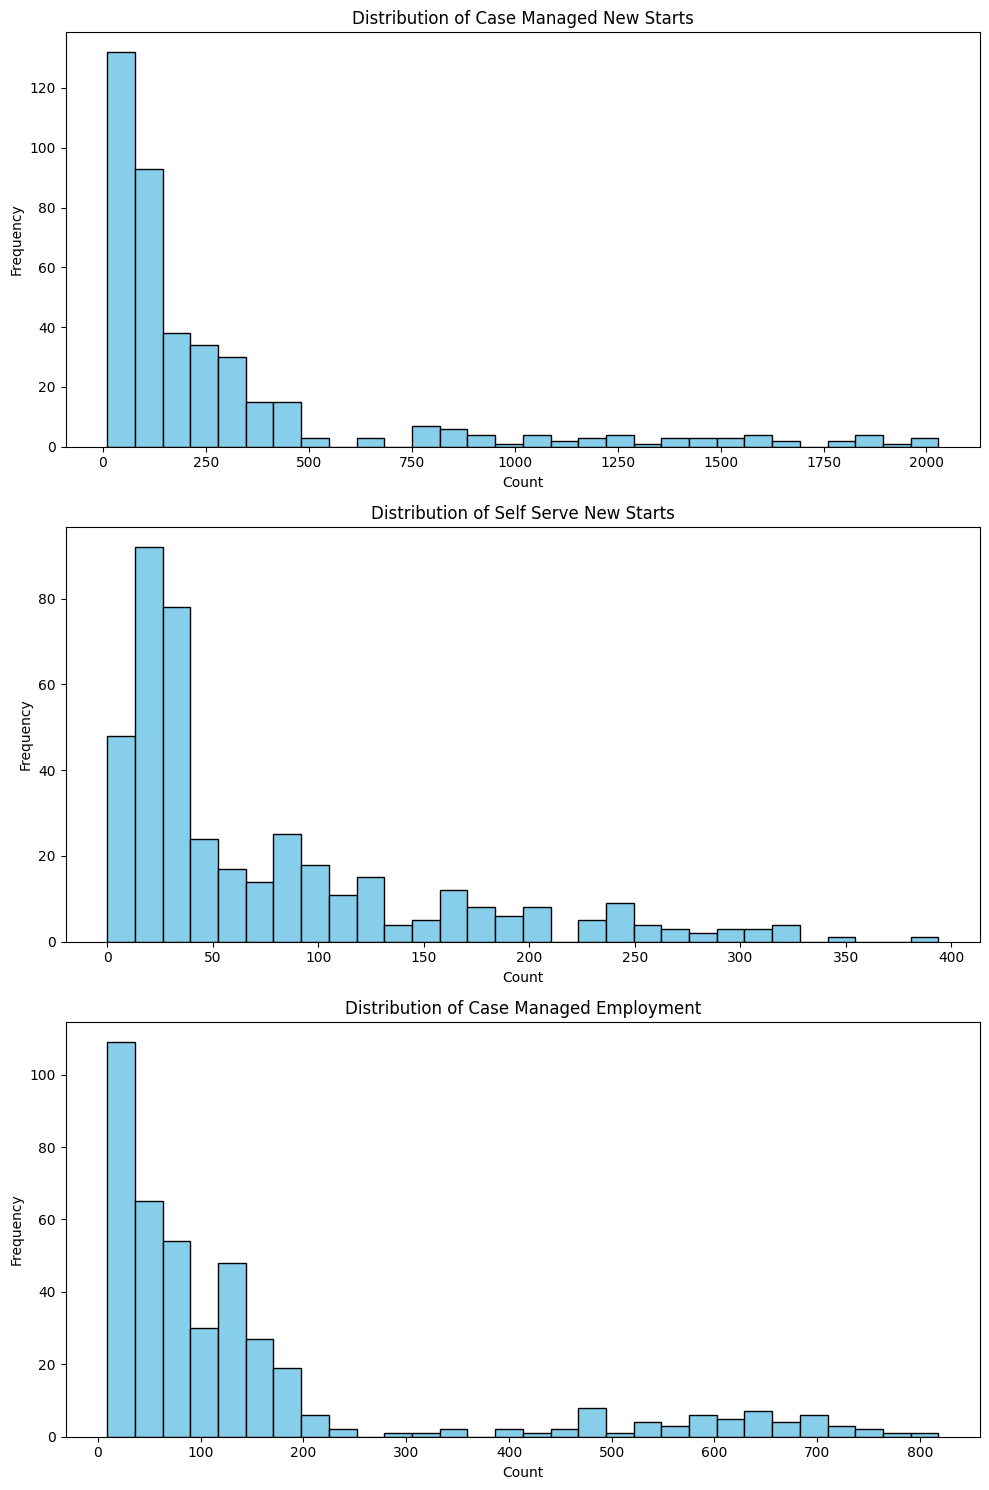

In [36]:
import matplotlib.pyplot as plt

# Creating histograms to visualize the distribution of numerical data
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

columns_to_plot = ['CaseManagedNewStarts', 'SelfServeNewStarts', 'CaseManagedEmployment']
titles = ['Distribution of Case Managed New Starts', 'Distribution of Self Serve New Starts', 'Distribution of Case Managed Employment']

for i, column in enumerate(columns_to_plot):
    ax[i].hist(df[column], bins=30, color='skyblue', edgecolor='black')
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Distribution Analysis:
Here are the histograms for each category:

- Case Managed New Starts: The distribution is right-skewed with a long tail, indicating that most regions have fewer new starts, but a few regions have a significantly higher number of new starts.

- Self Serve New Starts: This distribution is also right-skewed, similar to case-managed starts, suggesting most regions have relatively few self-serve starts with some exceptions.

- Case Managed Employment: Again, the distribution is right-skewed with a long tail, indicating variability in employment outcomes, with most regions seeing fewer employments and fewer regions seeing much higher counts.


These plots suggest the presence of outliers and potential areas to investigate further, such as understanding which regions or times may be contributing to these extremes.

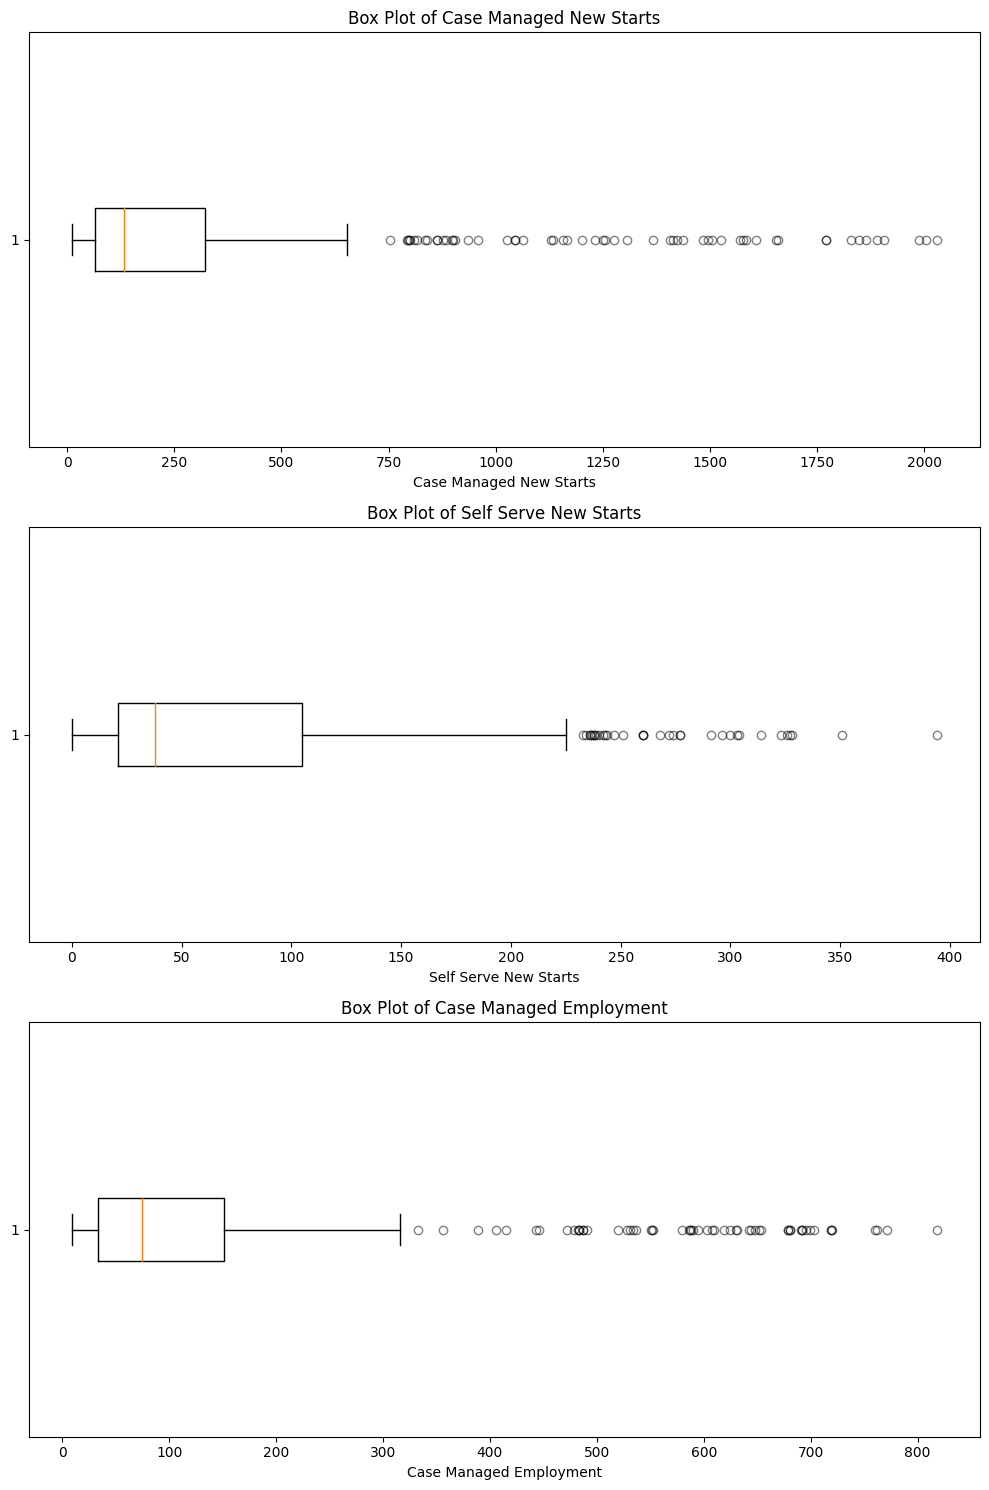

In [37]:
# Creating box plots to visualize the distribution of each key metric
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plotting each metric
ax[0].boxplot(df['CaseManagedNewStarts'], vert=False, flierprops=dict(marker='o', color='red', alpha=0.5))
ax[0].set_title('Box Plot of Case Managed New Starts')
ax[0].set_xlabel('Case Managed New Starts')

ax[1].boxplot(df['SelfServeNewStarts'], vert=False, flierprops=dict(marker='o', color='red', alpha=0.5))
ax[1].set_title('Box Plot of Self Serve New Starts')
ax[1].set_xlabel('Self Serve New Starts')

ax[2].boxplot(df['CaseManagedEmployment'], vert=False, flierprops=dict(marker='o', color='red', alpha=0.5))
ax[2].set_title('Box Plot of Case Managed Employment')
ax[2].set_xlabel('Case Managed Employment')

plt.tight_layout()
plt.show()


The box plots showed, for each key metric visually illustrate the distributions and help us to identify outliers:

- Case Managed New Starts: A significant number of outliers can be observed above the upper whisker, which indicates that there are regions with exceptionally high numbers of new starts.

- Self Serve New Starts: Fewer outliers are present compared to case managed starts, but there are still a notable number above the upper whisker, suggesting that some regions also experience high numbers of self-serve starts.

- Case Managed Employment: This metric also has outliers above the upper whisker, indicating that some regions have higher employment successes through case management.


These outliers warrant a closer examination to understand why certain regions might be experiencing higher numbers, which could be due to a variety of factors, such as economic conditions, population density, or the presence of large employers.

In [38]:
import numpy as np
# Ensure only numeric columns are included for the calculation of IQR
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the IQR for numeric columns only
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers for each numeric column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Now you can safely identify outliers
outliers_case_managed_starts = numeric_data[(numeric_data['CaseManagedNewStarts'] > upper_bound['CaseManagedNewStarts'])]
outliers_self_serve_starts = numeric_data[(numeric_data['SelfServeNewStarts'] > upper_bound['SelfServeNewStarts'])]
outliers_case_managed_employment = numeric_data[(numeric_data['CaseManagedEmployment'] > upper_bound['CaseManagedEmployment'])]


In [39]:
# Tagging each outlier DataFrame and avoiding the SettingWithCopyWarning
outliers_case_managed_starts = outliers_case_managed_starts.copy()
outliers_case_managed_starts['OutlierType'] = 'CaseManagedNewStarts'

outliers_self_serve_starts = outliers_self_serve_starts.copy()
outliers_self_serve_starts['OutlierType'] = 'SelfServeNewStarts'

outliers_case_managed_employment = outliers_case_managed_employment.copy()
outliers_case_managed_employment['OutlierType'] = 'CaseManagedEmployment'

# Merging the tagged outlier DataFrames with the original DataFrame
merged_df = df.merge(outliers_case_managed_starts[['OutlierType']], left_index=True, right_index=True, how='outer')
merged_df = merged_df.merge(outliers_self_serve_starts[['OutlierType']], left_index=True, right_index=True, how='outer', suffixes=('_CMNS', '_SSNS'))
merged_df = merged_df.merge(outliers_case_managed_employment[['OutlierType']], left_index=True, right_index=True, how='outer', suffixes=('', '_CME'))


In [40]:
merged_df.head(5)

,YM,RegionCode,CaseManagedNewStarts,SelfServeNewStarts,CaseManagedEmployment,RegionDescription,OutlierType_CMNS,OutlierType_SSNS,OutlierType
0,201904,EDR1,297,351,196,Vancouver Island / Coast,NaN,SelfServeNewStarts,NaN
1,201904,EDR2,840,243,333,Mainland / Southwest,CaseManagedNewStarts,SelfServeNewStarts,CaseManagedEmployment
2,201904,EDR3,321,183,177,Thompson / Okanagan,NaN,NaN,NaN
3,201904,EDR4,105,75,81,Kootenay,NaN,NaN,NaN
4,201904,EDR5,120,70,63,Cariboo,NaN,NaN,NaN


now we have a DataFrame that includes the outlier information alongside the original data. Each row in the DataFrame represents a record from your original dataset, and the additional OutlierType_CMNS, OutlierType_SSNS, and OutlierType columns indicate whether that record was flagged as an outlier in the respective categories.

Here's how to interpret the additional columns:

- A NaN value means that the record was not an outlier for that category.
- A non-NaN value (such as 'CaseManagedNewStarts', 'SelfServeNewStarts', or 'CaseManagedEmployment') indicates that the record is an outlier in that specific category.

Now we can analyze Outlier Patterns ie determine if outliers are concentrated in specific regions or time periods.

In [41]:
outlier_counts_by_region = merged_df.groupby('RegionDescription').agg({
    'OutlierType_CMNS': 'count',
    'OutlierType_SSNS': 'count',
    'OutlierType': 'count'
}).reset_index()

In [42]:
# Next, aggregate by YM to see if outliers are occurring during specific time periods
outlier_counts_by_time = merged_df.groupby('YM').agg({
    'OutlierType_CMNS': 'count',
    'OutlierType_SSNS': 'count',
    'OutlierType': 'count'
}).reset_index()

# For a detailed analysis, aggregate by both RegionDescription and YM
outlier_counts_by_region_time = merged_df.groupby(['RegionDescription', 'YM']).agg({
    'OutlierType_CMNS': 'count',
    'OutlierType_SSNS': 'count',
    'OutlierType': 'count'
}).reset_index()

In [43]:
# Sorting the DataFrame by region to see which regions have the most outliers
sorted_outliers_by_region = outlier_counts_by_region.sort_values(by=['OutlierType_CMNS', 'OutlierType_SSNS', 'OutlierType'], ascending=False)

# Sorting the DataFrame by time to see which time periods have the most outliers
sorted_outliers_by_time = outlier_counts_by_time.sort_values(by=['OutlierType_CMNS', 'OutlierType_SSNS', 'OutlierType'], ascending=False)

# Sorting the detailed DataFrame by region and time
sorted_outliers_by_region_time = outlier_counts_by_region_time.sort_values(by=['OutlierType_CMNS', 'OutlierType_SSNS', 'OutlierType'], ascending=False)


In [44]:
sorted_outliers_by_region_time.head()

,RegionDescription,YM,OutlierType_CMNS,OutlierType_SSNS,OutlierType
120,Mainland / Southwest,201904,1,1,1
121,Mainland / Southwest,201905,1,1,1
122,Mainland / Southwest,201906,1,1,1
123,Mainland / Southwest,201907,1,1,1
124,Mainland / Southwest,201908,1,1,1


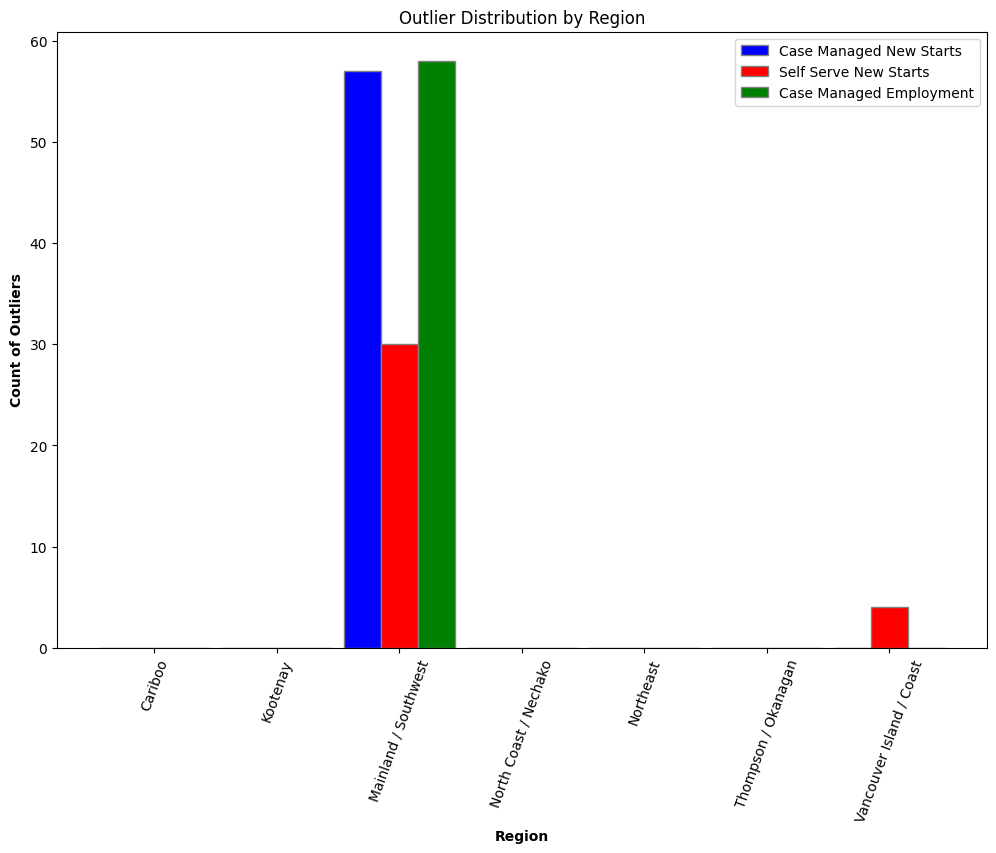

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by RegionDescription
outlier_counts = sorted_outliers_by_region_time.groupby('RegionDescription').agg({
    'OutlierType_CMNS': 'sum',
    'OutlierType_SSNS': 'sum',
    'OutlierType': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.3
r1 = range(len(outlier_counts))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, outlier_counts['OutlierType_CMNS'], color='b', width=bar_width, edgecolor='grey', label='Case Managed New Starts')
plt.bar(r2, outlier_counts['OutlierType_SSNS'], color='r', width=bar_width, edgecolor='grey', label='Self Serve New Starts')
plt.bar(r3, outlier_counts['OutlierType'], color='g', width=bar_width, edgecolor='grey', label='Case Managed Employment')

# Add xticks on the middle of the group bars
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Count of Outliers', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(outlier_counts))], outlier_counts['RegionDescription'])

plt.title('Outlier Distribution by Region')
plt.xticks(rotation=70)

plt.legend()
plt.show()

Mainland/Southwest consistently shows outliers across multiple years and months for all three types of services. This suggests that this region may have specific characteristics or external factors influencing these results, such as economic fluctuations, policy changes, or other local events.

In [68]:
sorted_outliers_by_region_time['YM'] = pd.to_datetime(sorted_outliers_by_region_time['YM'], format='%Y%m')


In [69]:
sorted_outliers_by_region_time['RegionDescription'].unique()

array(['Mainland / Southwest', 'Vancouver Island / Coast', 'Cariboo',
       'Kootenay', 'North Coast / Nechako', 'Northeast',
       'Thompson / Okanagan'], dtype=object)

In [70]:
edr2_data = sorted_outliers_by_region_time[sorted_outliers_by_region_time['RegionDescription'] == 'Mainland / Southwest']
edr2_data.head()

,RegionDescription,YM,OutlierType_CMNS,OutlierType_SSNS,OutlierType
120,Mainland / Southwest,2019-04-01,1,1,1
121,Mainland / Southwest,2019-05-01,1,1,1
122,Mainland / Southwest,2019-06-01,1,1,1
123,Mainland / Southwest,2019-07-01,1,1,1
124,Mainland / Southwest,2019-08-01,1,1,1


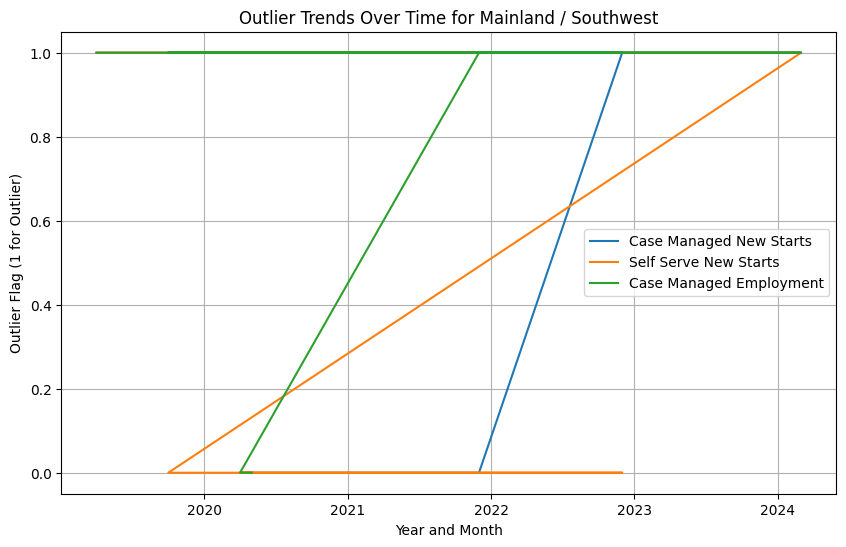

In [72]:
# Line Plot for Outlier Trends in Mainland / Southwest
plt.figure(figsize=(10, 6))
plt.plot(edr2_data['YM'], edr2_data['OutlierType_CMNS'], label='Case Managed New Starts')
plt.plot(edr2_data['YM'], edr2_data['OutlierType_SSNS'], label='Self Serve New Starts')
plt.plot(edr2_data['YM'], edr2_data['OutlierType'], label='Case Managed Employment')
plt.title('Outlier Trends Over Time for Mainland / Southwest')
plt.xlabel('Year and Month')
plt.ylabel('Outlier Flag (1 for Outlier)')
plt.legend()
plt.grid(True)
plt.show()

 Each line represents the trend of the proportion of records flagged as outliers for each category.


Here’s what can be inferred from the plot:

- Case Managed New Starts: This trend is stable throughout the observed time period, suggesting a consistent proportion of outliers in this category.

- Self Serve New Starts: This line shows a gradual increase, indicating that the proportion of outliers has been growing over time.

- Case Managed Employment: There is a sharp increase toward the end of the time series, which could point to a significant event or change that has caused a surge in the number of case-managed employments classified as outliers.

# Time Series Analysis:

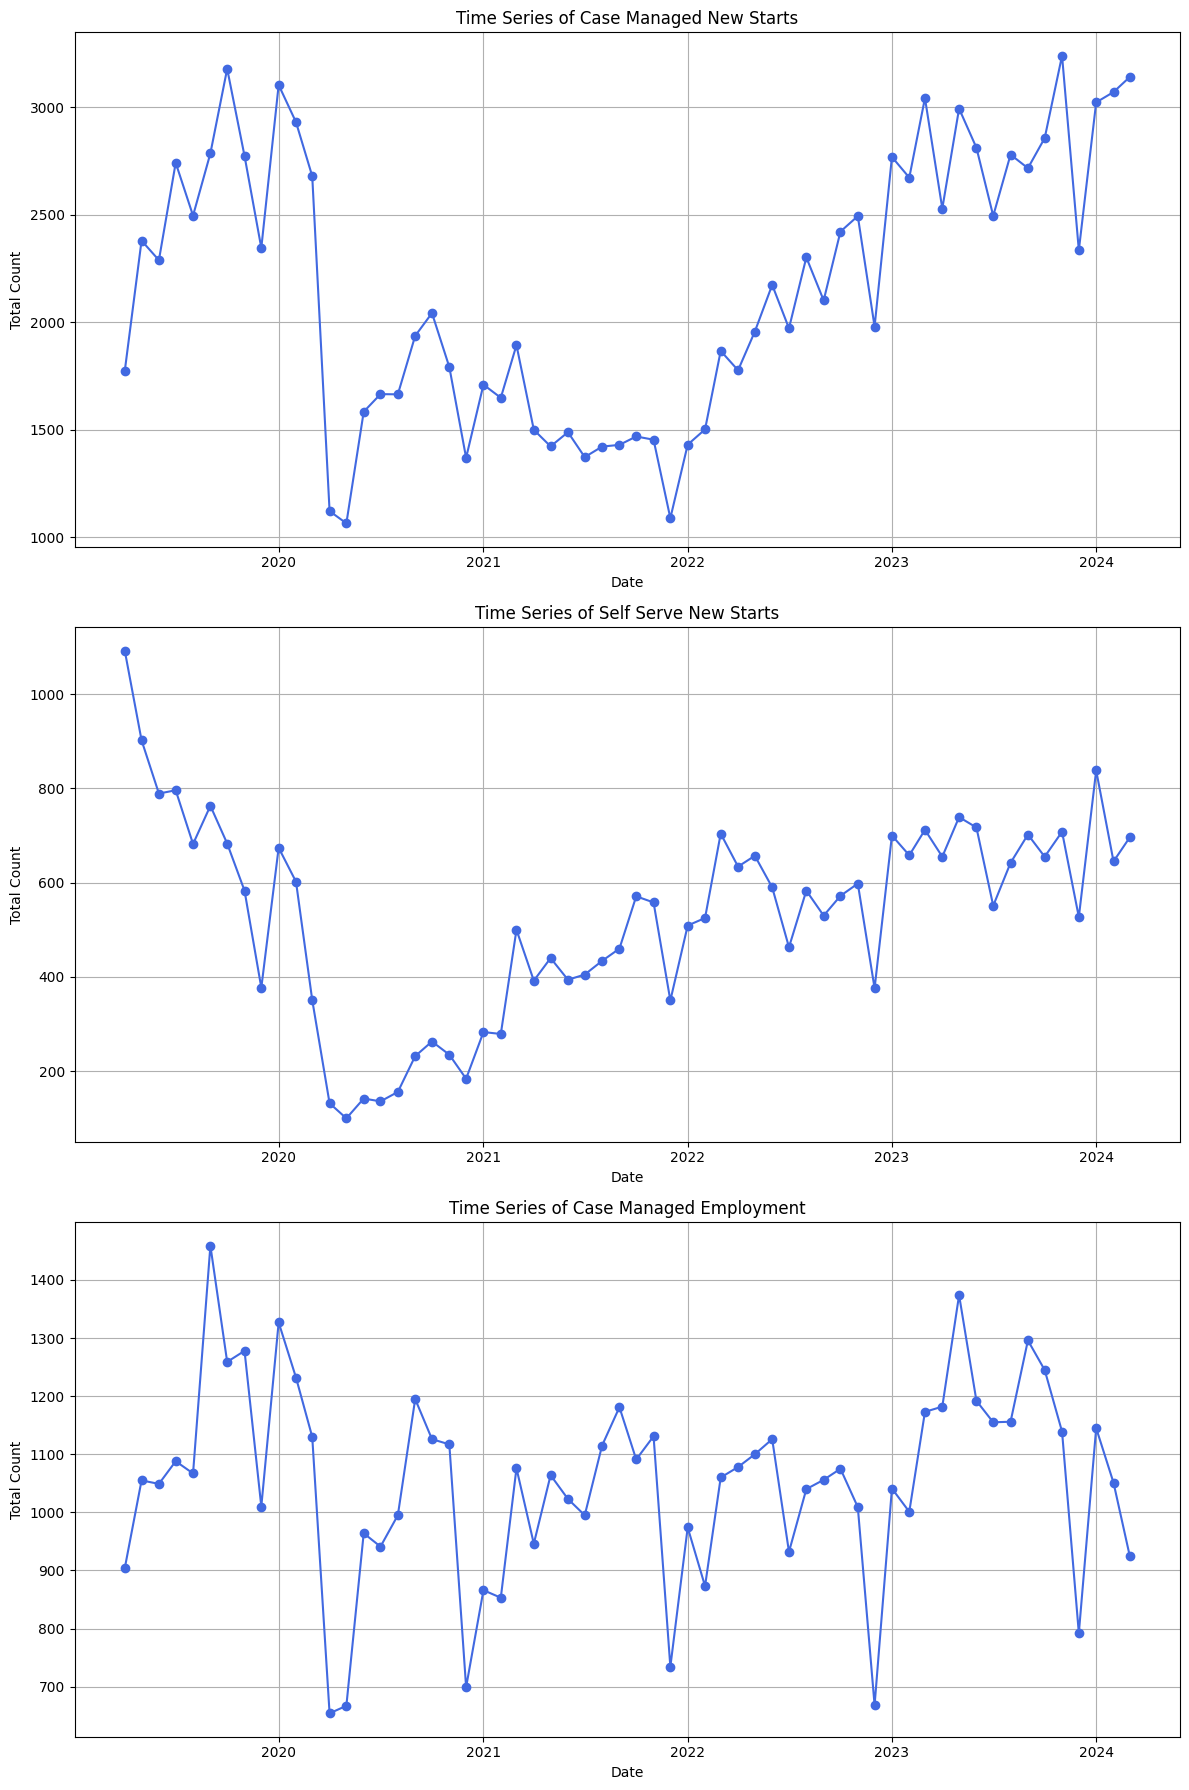

In [74]:
# Converting 'YM' to datetime format for time series analysis
data['Date'] = pd.to_datetime(data['YM'], format='%Y%m')

# Grouping data by Date to see overall trends
time_series_data = data.groupby('Date').sum()

# Plotting time series for each metric
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

metrics = ['CaseManagedNewStarts', 'SelfServeNewStarts', 'CaseManagedEmployment']
titles = ['Time Series of Case Managed New Starts', 'Time Series of Self Serve New Starts', 'Time Series of Case Managed Employment']

for i, metric in enumerate(metrics):
    ax[i].plot(time_series_data.index, time_series_data[metric], marker='o', linestyle='-', color='royalblue')
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Total Count')
    ax[i].grid(True)

plt.tight_layout()
plt.show()


Here's how each of the metrics has trended over time:

- Case Managed New Starts: Shows variability over time with certain peaks. This might be influenced by seasonal factors, policy changes, or other external events.

- Self Serve New Starts: Also exhibits some fluctuation, though the trend seems to have lower peaks compared to case managed starts. This could indicate a steady demand for self-serve services with occasional increases.

- Case Managed Employment:The trend shows peaks similar to case managed new starts, which suggests a possible correlation between new starts and successful employments.These trends can provide useful insights into the performance and impacts of the WorkBC Employment Services over time. Analyzing them against external events or changes in the service provision could reveal more about the drivers behind these patterns.

**Conclusion:**
The project's journey through the complex terrain of WorkBC's employment services data has revealed a landscape marked by notable regional divergences and temporal shifts. Our analysis surfaced a persistent concentration of outliers in the Mainland / Southwest region, suggesting a unique interplay of factors that drive the demand and success rates of employment services in this locale. Moreover, the rising trends in self-serve starts hint at evolving job seeker behaviors or service delivery models that merit further investigation.

These findings underscore the necessity for region-specific approaches in addressing employment service needs. The stark increase in outliers for case managed employment, particularly towards the later years in our dataset, calls for a closer examination of programmatic changes or external economic influences that precipitated this surge.

As policymakers and program administrators move forward, this analysis advocates for a data-informed perspective that not only reacts to statistical anomalies but also proactively interrogates the stories behind the numbers. Ultimately, this project's insights aim to contribute to a broader narrative—one where data does not merely inform policy but propels a more equitable and responsive employment service ecosystem across British Columbia.